# Shuffling of simple and twisted read pairs

## Description of the analysis

In this notebook, we use the script [```diachrscripts/simulate_interactions_script.py```](https://github.com/TheJacksonLaboratory/diachrscripts/blob/master/simulate_interactions_script.py) to generate two interaction files supplemented with binomial P-values. One file contains the original interactions, the other file contains interactions with the same coordinates but with randomly shuffled proportions of simple and twisted read pairs, for instance, if the original interaction has one simple and five twisted read pairs, a new number of simple read pairs is drawn from ```binom.rvs(6, 0.5)```, which could result in four simple and consequently two twisted read pairs.

Apart from the interactions files, numpy arrays with P-values for original and simulated data are saved to disk that can be loaded into this notebook in order examine the distribution of P-values using, for instance, a qq-plot.

## Choose dataset

We analyzed four datasets, three capture Hi-C (Mifsud 2015, Schoenfelder 2015, Chesi 2019) and one Hi-C dataset (Nora 2017). In this section, individual datasets can be selected for the analysis that can be performed in the third section of this notebook.

### Mifsud 2015 (Promoter capture Hi-C, GM12878 and CD34+ blood cells, hg38, HindIII)

In [3]:
# Create output directory
!mkdir -p ../results/mifsud/simulated_interactions

#### Replicate 1

In [1]:
OUT_PREFIX = "../results/mifsud/simulated_interactions/simulated_interactions_mifsud_r1"
INTERACTION_FILE = "../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R10.interaction.counts.table.gt1.tsv.gz"

#### Replicate 2

In [1]:
OUT_PREFIX = "../results/mifsud/simulated_interactions/simulated_interactions_mifsud_r2"
INTERACTION_FILE = "../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R20.interaction.counts.table.gt1.tsv.gz"

#### Replicate 3

In [3]:
OUT_PREFIX = "../results/mifsud/simulated_interactions/simulated_interactions_mifsud_r3"
INTERACTION_FILE = "../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R30.interaction.counts.table.gt1.tsv.gz"

### Schoenfelder 2015 (Promoter capture Hi-C, mES cells, mm10, HindIII)

In [ ]:
# Create output directory
!mkdir -p ../results/schoenefelder/simulated_interactions

#### Replicate 1

In [3]:
OUT_PREFIX = "../results/schoenefelder/simulated_interactions/simulated_interactions_schoenefelder_r1"
INTERACTION_FILE = "../diachrscripts_data/schoenefelder_2015_mm10/data/gzdir/SCHOEN_R10.interaction.counts.table.gt1.tsv.gz

#### Replicate 2

In [3]:
OUT_PREFIX = "../results/schoenefelder/simulated_interactions/simulated_interactions_schoenefelder_r2"
INTERACTION_FILE = "../diachrscripts_data/schoenefelder_2015_mm10/data/gzdir/SCHOEN_R20.interaction.counts.table.gt1.tsv.gz

### Chesi 2019 (Promoter Capture-C, BMP2 induced osteoblasts and HepG2 cells, hg38, DpnII)

#### Replicate 1

## Perform analysis

In [2]:
# Run Python script
!python ../simulate_interactions_script.py --out-prefix $OUT_PREFIX --interaction-file $INTERACTION_FILE

[INFO] Input parameters
	[INFO] Analysis for: ../results/mifsud/simulated_interactions/simulated_interactions_mifsud_r2
	[INFO] Interaction file: ../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R20.interaction.counts.table.gt1.tsv.gz
[INFO] Simulating random simple twisted read pairs for each interaction in ../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R20.interaction.counts.table.gt1.tsv.gz ...
	[INFO] 0 interactions processed ...
	[INFO] 100000 interactions processed ...
	[INFO] 200000 interactions processed ...
	[INFO] 300000 interactions processed ...
	[INFO] 400000 interactions processed ...
	[INFO] 500000 interactions processed ...
	[INFO] 600000 interactions processed ...
	[INFO] 700000 interactions processed ...
	[INFO] 800000 interactions processed ...
	[INFO] 900000 interactions processed ...
	[INFO] 1000000 interactions processed ...
	[INFO] 1100000 interactions processed ...
	[INFO] 1200000 interactions processed ...
	[INFO] 1300000 interactions processe

In [3]:
# Load modules
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pylab

In [4]:
# Load saved numpy arrays from disk
array_path = OUT_PREFIX + "_original_pvals.npy"
pval_array_original = np.load(array_path)
array_path = OUT_PREFIX + "_simulated_pvals.npy"
pval_array_simulated = np.load(array_path)

[(0, 1), Text(0, 0.5, 'Simulated data'), (0, 1), Text(0.5, 0, 'Original data')]

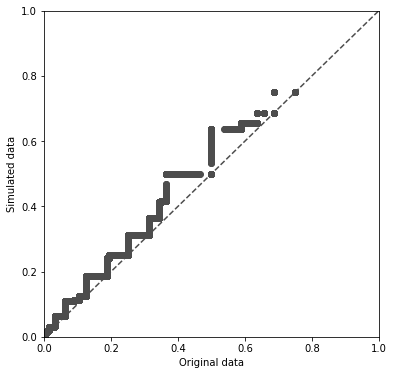

In [5]:
# Create scatterplot of original and simulated data for the range 0.0, ..., 1.0
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(np.sort(pval_array_original), np.sort(pval_array_simulated), c=".3")
ax.plot([0, 1], [0, 1], ls="--", c=".3")
ax.set(xlim=(0, 1), ylim=(0, 1), xlabel="Original data", ylabel="Simulated data")

[(0, 0.1),
 Text(0, 0.5, 'Simulated data'),
 (0, 0.1),
 Text(0.5, 0, 'Original data')]

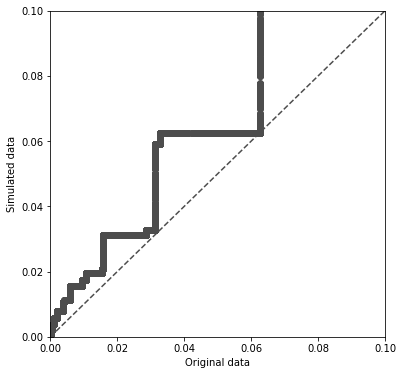

In [7]:
# Create scatterplot of original and simulated data for the range 0.0, ..., 0.1
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(np.sort(pval_array_original), np.sort(pval_array_simulated), c=".3")
ax.plot([0, 0.1], [0, 0.1], ls="--", c=".3")
ax.set(xlim=(0, 0.1), ylim=(0, 0.1), xlabel="Original data", ylabel="Simulated data")

((array([7.33615126e-08, 1.78072923e-07, 2.83911214e-07, ...,
         9.99999716e-01, 9.99999822e-01, 9.99999927e-01]),
  array([1.11022302e-16, 4.54747351e-13, 7.47180096e-13, ...,
         7.50000000e-01, 7.50000000e-01, 7.50000000e-01])),
 (0.7790346738298188, 0.04950474242230246, 0.9644353530841081))

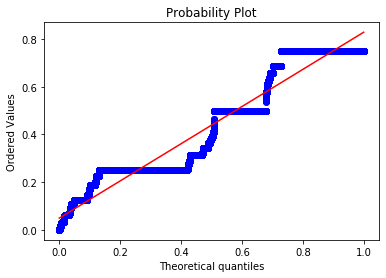

In [8]:
stats.probplot(pval_array_original, dist="uniform", plot=pylab)

In [ ]:
stats.probplot(pval_array_simulated, dist="uniform", plot=pylab)

((array([7.33615126e-08, 1.78072923e-07, 2.83911214e-07, ...,
         9.99999716e-01, 9.99999822e-01, 9.99999927e-01]),
  array([3.81469727e-06, 1.52587891e-05, 1.79409981e-05, ...,
         7.50000000e-01, 7.50000000e-01, 7.50000000e-01])),
 (0.7713566683663632, 0.06358767765900392, 0.965390523376223))

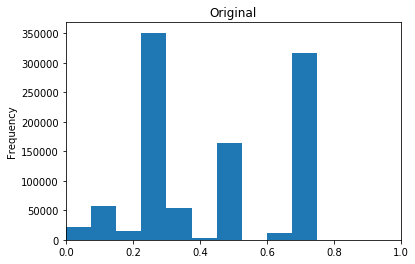

In [295]:
plt.hist(pval_array_original, bins=10)
plt.gca().set(title='Original', ylabel='Frequency', xlim=(0,1));

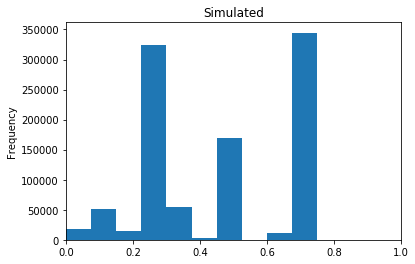

In [296]:
plt.hist(pval_array_simulated, bins=10)
plt.gca().set(title='Simulated', ylabel='Frequency', xlim=(0,1));

In [297]:
# Check function for P-value calculation
import importlib.util
spec = importlib.util.spec_from_file_location("diachrscripts_toolkit", "../diachrscripts_toolkit.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)

fixed_val = 1
print("\n-----Fixed simple-----")
t=fixed_val
for s in range(0,20):
    i = foo.Interaction("chrX\t123865109\t123881107\tI\tchrX\t123886906\t123888573\tI\t" + str(s) + ":" + str(t))
    pv = i.get_binomial_p_value()
    print(str(s) + ":" + str(t) + "\t" + str(pv))
print("\n-----Fixed twisted-----")    
s=fixed_val
for t in range(0,20):
    i = foo.Interaction("chrX\t123865109\t123881107\tI\tchrX\t123886906\t123888573\tI\t" + str(s) + ":" + str(t))
    pv = i.get_binomial_p_value()
    print(str(s) + ":" + str(t) + "\t" + str(pv))



-----Fixed simple-----
0:1	0.5
1:1	0.75
2:1	0.5
3:1	0.3125
4:1	0.1875
5:1	0.109375
6:1	0.0625
7:1	0.03515625
8:1	0.01953125
9:1	0.0107421875
10:1	0.005859375
11:1	0.003173828125
12:1	0.001708984375
13:1	0.00091552734375
14:1	0.00048828125
15:1	0.0002593994140625
16:1	0.0001373291015625
17:1	7.2479248046875e-05
18:1	3.814697265625e-05
19:1	2.002716064453125e-05

-----Fixed twisted-----
1:0	0.5
1:1	0.75
1:2	0.5
1:3	0.3125
1:4	0.1875
1:5	0.109375
1:6	0.0625
1:7	0.03515625
1:8	0.01953125
1:9	0.0107421875
1:10	0.005859375
1:11	0.003173828125
1:12	0.001708984375
1:13	0.00091552734375
1:14	0.00048828125
1:15	0.0002593994140625
1:16	0.0001373291015625
1:17	7.2479248046875e-05
1:18	3.814697265625e-05
1:19	2.002716064453125e-05
